___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Decision Trees and Random Forests in Python

This is the code for the lecture video which goes over tree methods in Python. Reference the video lecture for the full explanation of the code!

I also wrote a [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) explaining the general logic of decision trees and random forests which you can check out. 

## Import Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas.util.testing as tm

## Get the Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)
x = print(float(accuracy_score))


TypeError: float() argument must be a string or a number, not 'function'

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas.util.testing as tm
import tkinter as tk
import sklearn
from tkinter import *
from tkinter.ttk import *
from tkinter.filedialog import askopenfile
from tkinter.filedialog import askopenfilename
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

window = tk.Tk()
window.title("NIDS & PS Using ML")
window.geometry('800x600')

label1 = tk.Label(window, text='Select a test CSV File To Upload & Clean').grid(column=0,row=0)

file = None
testfinal = None

def open_file():   
    global file
    global testfinal
    #file = askopenfile(mode ='r', filetypes =[('CSV Files', '*.csv')])
    file = askopenfilename(filetypes =[('CSV Files', '*.csv')]) 
    if file is not None: 
        print(file)  
        label2 = tk.Label(window, text="Reading the CSV File").grid(column=0,row=1)
        testfinal = pd.read_csv(file)
        testfinal = testfinal.rename(columns={"Max packet Length": "Max Packet Length","Bwd Segment Size Avg": "Avg Bwd Segment Size","FWD Init Win Bytes": "Init_Win_bytes_forward","Fwd Seg Size Min": "min_seg_size_forward"})
        testfinal = testfinal.drop(['Dst Port','Flow ID','Src IP','Src Port','Dst IP','Protocol','Timestamp','Total Fwd Packet','Total Bwd packets','Total Length of Fwd Packet','Total Length of Bwd Packet','Fwd Packet Length Max','Fwd Packet Length Min','Fwd Packet Length Mean','Fwd Packet Length Std','Bwd Packet Length Min','Flow Bytes/s','Flow Packets/s','Bwd IAT Total','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Packets/s','Packet Length Min','SYN Flag Count','RST Flag Count','URG Flag Count','CWE Flag Count','ECE Flag Count','Down/Up Ratio','Fwd Segment Size Avg','Fwd Bytes/Bulk Avg','Fwd Packet/Bulk Avg','Fwd Bulk Rate Avg','Bwd Bytes/Bulk Avg','Bwd Packet/Bulk Avg','Bwd Bulk Rate Avg','Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets','Subflow Bwd Bytes','Bwd Init Win Bytes','Fwd Act Data Pkts'], axis=1)
        testfinal["Label"] = testfinal["Label"].replace("NeedManualLabel","")
        testfinal = testfinal.replace([np.inf, -np.inf], np.nan)
        testfinal = testfinal.replace('Infinite', np.nan)
        testfinal = testfinal.dropna()
        a = testfinal['Flow Duration'].dtypes
        for colname in list(testfinal):
            if testfinal[colname].dtype == np.float64:
                testfinal[colname] = testfinal[colname].astype('int64')
        testfinal.to_csv(file)
        testfinal = pd.read_csv(file)
        label3 = tk.Label(window, text="Cleaning Complete!").grid(column=0,row=2)

btn1 = Button(window, text ='Open', command = lambda:open_file()) 
btn1.grid(column=1, row=0) 

label4 = tk.Label(window, text='Train the model').grid(column=0, row=3)

ddf = None
X = None
y = None
X_train = None
X_test = None
y_train = None
y_test = None
dtree = None
predictions = None
dec_accuracy = None
rfc = None
rfc_pred = None
rfc_accuracy = None
def train_model_dec():
    global ddf
    global X
    global y
    global X_train 
    global X_test
    global y_train
    global y_test
    global dtree
    global predictions
    global dec_accuracy
    global rfc
    global rfc_pred
    global rfc_accuracy
    ddf = pd.read_csv(r'C:\Users\dcost\Desktop\mainproj\main1.csv')
    ddf = ddf.drop(ddf.columns[[0]], axis=1)
    #if training and testing data are in the same dataframe
    X = ddf.drop('Label',axis=1)
    y = ddf['Label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train,y_train)
    predictions = dtree.predict(X_test)
    dec_accuracy = sklearn.metrics.accuracy_score(y_test, predictions, normalize=True, sample_weight=None)
    print(dec_accuracy)
    label5 = tk.Label(window, text="Click on Continue to Proceed ").grid(column=0,row=4)

btn2 = Button(window, text ='Train', command = lambda:train_model_dec()) 
btn2.grid(column=1, row=3)
    
def train_model_rfc():
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    rfc_accuracy = sklearn.metrics.accuracy_score(y_test, rfc_pred, normalize=True, sample_weight=None)
    print(rfc_accuracy)
    label6 = tk.Label(window, text="Training Complete").grid(column=0,row=5)
    
btn3 = Button(window, text ='Continue', command = lambda:train_model_rfc()) 
btn3.grid(column=2, row=3)

label7 = tk.Label(window, text='Scan the CSV').grid(column=0,row=6)

lableToAttackDict = None
list_pred = None

def scan_csv_dec():
    global X_train 
    global X_test
    global y_train
    global y_test
    global lableToAttackDict
    X_train = ddf.drop('Label',axis=1)
    y_train = ddf['Label']
    X_test = testfinal.drop('Label',axis=1)
    y_test = testfinal['Label']
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train,y_train)
    predictions = dtree.predict(X_test)
    label8 = tk.Label(window, text="Click on Continue to Proceed ").grid(column=0,row=3)
    
btn4 = Button(window, text ='Scan', command = lambda:scan_csv_dec()) 
btn4.grid(column=1, row=4)

def scan_csv_rfc():
    global list_pred
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    list_pred = []
    lableToAttackDict = {0: 'BENIGN', 1: 'DoS Hulk', 2: 'PortScan', 3: 'DDoS', 4: 'DoS GoldenEye', 5: 'FTP-Patator', 6: 'SSH-Patator', 7: 'DoS slowloris', 8: 'DoS Slowhttptest', 9: 'Bot', 10: 'Web Attack  Brute Force', 11: 'Web Attack XSS', 12: 'Infiltration', 13: 'Web Attack Sql Injection', 14: 'Heartbleed'}
    for i in rfc_predict:
        list_pred.append(lableToAttackDict.get(i))
#         print(lableToAttackDict.get(i))
#         pred = lableToAttackDict.get(i)
    label9 = tk.Label(window, text=str(list_pred)).grid(column=0,row=5)    
    label10 = tk.Label(window, text="Scan Complete").grid(column=0,row=5)  
    
btn5 = Button(window, text ='Continue', command = lambda:scan_csv_rfc()) 
btn5.grid(column=1, row=4)
        

    




# def printData(firstName, lastName):
#     print(firstName)
#     print(lastName)
#     root.destroy()

# def get_input():

#     firstName = entry1.get()
#     lastName = entry2.get()
#     printData(firstName, lastName)


# #Label 1
# label1 = Label(window,text = 'First Name')
# label1.pack()
# label1.config(justify = CENTER)

# entry1 = Entry(window, width = 30)
# entry1.pack()

# label3 = Label(window, text="Last Name")
# label3.pack()
# label1.config(justify = CENTER)

# entry2 = Entry(window, width = 30)
# entry2.pack()

# button1 = Button(window, text = 'submit')
# button1.pack() 
# button1.config(command = get_input)

window.mainloop()

In [33]:
print(file)

C:/Users/dcost/Desktop/mainproj/xxs.csv


Cleaning The Data


In [0]:
bruteforce = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Brute Force Attack.pcap_Flow.csv')
ddos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ddos_exe-1.pcap_Flow.csv')
ftp_ssh = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ftp.pcap_Flow.csv')
goldeneye = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GoldenEye.pcap_Flow.csv')
heartbleed = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SSL_Heartbleed_In_Action_Encrypted.s0i0.pcap_Flow.csv')
httptest = pd.read_csv('/content/drive/My Drive/Colab Notebooks/httptestpcap_Flow.csv')
hulk = pd.read_csv('/content/drive/My Drive/Colab Notebooks/hulk.pcap_Flow.csv')
portscan = pd.read_csv('/content/drive/My Drive/Colab Notebooks/portscan_PracticalPacketAnalysis.pcap_Flow.csv')
slowloris = pd.read_csv('/content/drive/My Drive/Colab Notebooks/http_slowloris.pcap_Flow.csv')
squ_injection = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sql injection.pcap_Flow.csv')
xxs = pd.read_csv('/content/drive/My Drive/Colab Notebooks/XSS.pcap_Flow.csv')
testing = pd.read_csv('/content/drive/My Drive/Colab Notebooks/testing.csv')

In [0]:
list(testing.columns.values.tolist()) 

In [0]:
testing = testing.rename(columns={"Max packet Length": "Max Packet Length","Bwd Segment Size Avg": "Avg Bwd Segment Size","FWD Init Win Bytes": "Init_Win_bytes_forward","Fwd Seg Size Min": "min_seg_size_forward"})
bruteforce = bruteforce.rename(columns={"Max packet Length": "Max Packet Length","Bwd Segment Size Avg": "Avg Bwd Segment Size","FWD Init Win Bytes": "Init_Win_bytes_forward","Fwd Seg Size Min": "min_seg_size_forward"})
ddos = ddos.rename(columns={"Max packet Length": "Max Packet Length","Bwd Segment Size Avg": "Avg Bwd Segment Size","FWD Init Win Bytes": "Init_Win_bytes_forward","Fwd Seg Size Min": "min_seg_size_forward"})
ftp_ssh = ftp_ssh.rename(columns={"Max packet Length": "Max Packet Length","Bwd Segment Size Avg": "Avg Bwd Segment Size","FWD Init Win Bytes": "Init_Win_bytes_forward","Fwd Seg Size Min": "min_seg_size_forward"})
goldeneye = goldeneye.rename(columns={"Max packet Length": "Max Packet Length","Bwd Segment Size Avg": "Avg Bwd Segment Size","FWD Init Win Bytes": "Init_Win_bytes_forward","Fwd Seg Size Min": "min_seg_size_forward"})
heartbleed = heartbleed.rename(columns={"Max packet Length": "Max Packet Length","Bwd Segment Size Avg": "Avg Bwd Segment Size","FWD Init Win Bytes": "Init_Win_bytes_forward","Fwd Seg Size Min": "min_seg_size_forward"})
httptest = httptest.rename(columns={"Max packet Length": "Max Packet Length","Bwd Segment Size Avg": "Avg Bwd Segment Size","FWD Init Win Bytes": "Init_Win_bytes_forward","Fwd Seg Size Min": "min_seg_size_forward"})
hulk = hulk.rename(columns={"Max packet Length": "Max Packet Length","Bwd Segment Size Avg": "Avg Bwd Segment Size","FWD Init Win Bytes": "Init_Win_bytes_forward","Fwd Seg Size Min": "min_seg_size_forward"})
portscan = portscan.rename(columns={"Max packet Length": "Max Packet Length","Bwd Segment Size Avg": "Avg Bwd Segment Size","FWD Init Win Bytes": "Init_Win_bytes_forward","Fwd Seg Size Min": "min_seg_size_forward"})
slowloris = slowloris.rename(columns={"Max packet Length": "Max Packet Length","Bwd Segment Size Avg": "Avg Bwd Segment Size","FWD Init Win Bytes": "Init_Win_bytes_forward","Fwd Seg Size Min": "min_seg_size_forward"})
squ_injection = squ_injection.rename(columns={"Max packet Length": "Max Packet Length","Bwd Segment Size Avg": "Avg Bwd Segment Size","FWD Init Win Bytes": "Init_Win_bytes_forward","Fwd Seg Size Min": "min_seg_size_forward"})
xxs = xxs.rename(columns={"Max packet Length": "Max Packet Length","Bwd Segment Size Avg": "Avg Bwd Segment Size","FWD Init Win Bytes": "Init_Win_bytes_forward","Fwd Seg Size Min": "min_seg_size_forward"})

In [0]:
testing = testing.drop(['Dst Port','Flow ID','Src IP','Src Port','Dst IP','Protocol','Timestamp','Total Fwd Packet','Total Bwd packets','Total Length of Fwd Packet','Total Length of Bwd Packet','Fwd Packet Length Max','Fwd Packet Length Min','Fwd Packet Length Mean','Fwd Packet Length Std','Bwd Packet Length Min','Flow Bytes/s','Flow Packets/s','Bwd IAT Total','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Packets/s','Packet Length Min','SYN Flag Count','RST Flag Count','URG Flag Count','CWE Flag Count','ECE Flag Count','Down/Up Ratio','Fwd Segment Size Avg','Fwd Bytes/Bulk Avg','Fwd Packet/Bulk Avg','Fwd Bulk Rate Avg','Bwd Bytes/Bulk Avg','Bwd Packet/Bulk Avg','Bwd Bulk Rate Avg','Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets','Subflow Bwd Bytes','Bwd Init Win Bytes','Fwd Act Data Pkts'], axis=1)
bruteforce = bruteforce.drop(['Dst Port','Flow ID','Src IP','Src Port','Dst IP','Protocol','Timestamp','Total Fwd Packet','Total Bwd packets','Total Length of Fwd Packet','Total Length of Bwd Packet','Fwd Packet Length Max','Fwd Packet Length Min','Fwd Packet Length Mean','Fwd Packet Length Std','Bwd Packet Length Min','Flow Bytes/s','Flow Packets/s','Bwd IAT Total','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Packets/s','Packet Length Min','SYN Flag Count','RST Flag Count','URG Flag Count','CWE Flag Count','ECE Flag Count','Down/Up Ratio','Fwd Segment Size Avg','Fwd Bytes/Bulk Avg','Fwd Packet/Bulk Avg','Fwd Bulk Rate Avg','Bwd Bytes/Bulk Avg','Bwd Packet/Bulk Avg','Bwd Bulk Rate Avg','Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets','Subflow Bwd Bytes','Bwd Init Win Bytes','Fwd Act Data Pkts'], axis=1)
ddos = ddos.drop(['Dst Port','Flow ID','Src IP','Src Port','Dst IP','Protocol','Timestamp','Total Fwd Packet','Total Bwd packets','Total Length of Fwd Packet','Total Length of Bwd Packet','Fwd Packet Length Max','Fwd Packet Length Min','Fwd Packet Length Mean','Fwd Packet Length Std','Bwd Packet Length Min','Flow Bytes/s','Flow Packets/s','Bwd IAT Total','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Packets/s','Packet Length Min','SYN Flag Count','RST Flag Count','URG Flag Count','CWE Flag Count','ECE Flag Count','Down/Up Ratio','Fwd Segment Size Avg','Fwd Bytes/Bulk Avg','Fwd Packet/Bulk Avg','Fwd Bulk Rate Avg','Bwd Bytes/Bulk Avg','Bwd Packet/Bulk Avg','Bwd Bulk Rate Avg','Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets','Subflow Bwd Bytes','Bwd Init Win Bytes','Fwd Act Data Pkts'], axis=1)
ftp_ssh = ftp_ssh.drop(['Dst Port','Flow ID','Src IP','Src Port','Dst IP','Protocol','Timestamp','Total Fwd Packet','Total Bwd packets','Total Length of Fwd Packet','Total Length of Bwd Packet','Fwd Packet Length Max','Fwd Packet Length Min','Fwd Packet Length Mean','Fwd Packet Length Std','Bwd Packet Length Min','Flow Bytes/s','Flow Packets/s','Bwd IAT Total','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Packets/s','Packet Length Min','SYN Flag Count','RST Flag Count','URG Flag Count','CWE Flag Count','ECE Flag Count','Down/Up Ratio','Fwd Segment Size Avg','Fwd Bytes/Bulk Avg','Fwd Packet/Bulk Avg','Fwd Bulk Rate Avg','Bwd Bytes/Bulk Avg','Bwd Packet/Bulk Avg','Bwd Bulk Rate Avg','Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets','Subflow Bwd Bytes','Bwd Init Win Bytes','Fwd Act Data Pkts'], axis=1)
goldeneye = goldeneye.drop(['Dst Port','Flow ID','Src IP','Src Port','Dst IP','Protocol','Timestamp','Total Fwd Packet','Total Bwd packets','Total Length of Fwd Packet','Total Length of Bwd Packet','Fwd Packet Length Max','Fwd Packet Length Min','Fwd Packet Length Mean','Fwd Packet Length Std','Bwd Packet Length Min','Flow Bytes/s','Flow Packets/s','Bwd IAT Total','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Packets/s','Packet Length Min','SYN Flag Count','RST Flag Count','URG Flag Count','CWE Flag Count','ECE Flag Count','Down/Up Ratio','Fwd Segment Size Avg','Fwd Bytes/Bulk Avg','Fwd Packet/Bulk Avg','Fwd Bulk Rate Avg','Bwd Bytes/Bulk Avg','Bwd Packet/Bulk Avg','Bwd Bulk Rate Avg','Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets','Subflow Bwd Bytes','Bwd Init Win Bytes','Fwd Act Data Pkts'], axis=1)
heartbleed = heartbleed.drop(['Dst Port','Flow ID','Src IP','Src Port','Dst IP','Protocol','Timestamp','Total Fwd Packet','Total Bwd packets','Total Length of Fwd Packet','Total Length of Bwd Packet','Fwd Packet Length Max','Fwd Packet Length Min','Fwd Packet Length Mean','Fwd Packet Length Std','Bwd Packet Length Min','Flow Bytes/s','Flow Packets/s','Bwd IAT Total','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Packets/s','Packet Length Min','SYN Flag Count','RST Flag Count','URG Flag Count','CWE Flag Count','ECE Flag Count','Down/Up Ratio','Fwd Segment Size Avg','Fwd Bytes/Bulk Avg','Fwd Packet/Bulk Avg','Fwd Bulk Rate Avg','Bwd Bytes/Bulk Avg','Bwd Packet/Bulk Avg','Bwd Bulk Rate Avg','Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets','Subflow Bwd Bytes','Bwd Init Win Bytes','Fwd Act Data Pkts'], axis=1)
httptest = httptest.drop(['Dst Port','Flow ID','Src IP','Src Port','Dst IP','Protocol','Timestamp','Total Fwd Packet','Total Bwd packets','Total Length of Fwd Packet','Total Length of Bwd Packet','Fwd Packet Length Max','Fwd Packet Length Min','Fwd Packet Length Mean','Fwd Packet Length Std','Bwd Packet Length Min','Flow Bytes/s','Flow Packets/s','Bwd IAT Total','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Packets/s','Packet Length Min','SYN Flag Count','RST Flag Count','URG Flag Count','CWE Flag Count','ECE Flag Count','Down/Up Ratio','Fwd Segment Size Avg','Fwd Bytes/Bulk Avg','Fwd Packet/Bulk Avg','Fwd Bulk Rate Avg','Bwd Bytes/Bulk Avg','Bwd Packet/Bulk Avg','Bwd Bulk Rate Avg','Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets','Subflow Bwd Bytes','Bwd Init Win Bytes','Fwd Act Data Pkts'], axis=1)
hulk = hulk.drop(['Dst Port','Flow ID','Src IP','Src Port','Dst IP','Protocol','Timestamp','Total Fwd Packet','Total Bwd packets','Total Length of Fwd Packet','Total Length of Bwd Packet','Fwd Packet Length Max','Fwd Packet Length Min','Fwd Packet Length Mean','Fwd Packet Length Std','Bwd Packet Length Min','Flow Bytes/s','Flow Packets/s','Bwd IAT Total','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Packets/s','Packet Length Min','SYN Flag Count','RST Flag Count','URG Flag Count','CWE Flag Count','ECE Flag Count','Down/Up Ratio','Fwd Segment Size Avg','Fwd Bytes/Bulk Avg','Fwd Packet/Bulk Avg','Fwd Bulk Rate Avg','Bwd Bytes/Bulk Avg','Bwd Packet/Bulk Avg','Bwd Bulk Rate Avg','Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets','Subflow Bwd Bytes','Bwd Init Win Bytes','Fwd Act Data Pkts'], axis=1)
portscan = portscan.drop(['Dst Port','Flow ID','Src IP','Src Port','Dst IP','Protocol','Timestamp','Total Fwd Packet','Total Bwd packets','Total Length of Fwd Packet','Total Length of Bwd Packet','Fwd Packet Length Max','Fwd Packet Length Min','Fwd Packet Length Mean','Fwd Packet Length Std','Bwd Packet Length Min','Flow Bytes/s','Flow Packets/s','Bwd IAT Total','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Packets/s','Packet Length Min','SYN Flag Count','RST Flag Count','URG Flag Count','CWE Flag Count','ECE Flag Count','Down/Up Ratio','Fwd Segment Size Avg','Fwd Bytes/Bulk Avg','Fwd Packet/Bulk Avg','Fwd Bulk Rate Avg','Bwd Bytes/Bulk Avg','Bwd Packet/Bulk Avg','Bwd Bulk Rate Avg','Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets','Subflow Bwd Bytes','Bwd Init Win Bytes','Fwd Act Data Pkts'], axis=1)
slowloris = slowloris.drop(['Dst Port','Flow ID','Src IP','Src Port','Dst IP','Protocol','Timestamp','Total Fwd Packet','Total Bwd packets','Total Length of Fwd Packet','Total Length of Bwd Packet','Fwd Packet Length Max','Fwd Packet Length Min','Fwd Packet Length Mean','Fwd Packet Length Std','Bwd Packet Length Min','Flow Bytes/s','Flow Packets/s','Bwd IAT Total','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Packets/s','Packet Length Min','SYN Flag Count','RST Flag Count','URG Flag Count','CWE Flag Count','ECE Flag Count','Down/Up Ratio','Fwd Segment Size Avg','Fwd Bytes/Bulk Avg','Fwd Packet/Bulk Avg','Fwd Bulk Rate Avg','Bwd Bytes/Bulk Avg','Bwd Packet/Bulk Avg','Bwd Bulk Rate Avg','Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets','Subflow Bwd Bytes','Bwd Init Win Bytes','Fwd Act Data Pkts'], axis=1)
squ_injection = squ_injection.drop(['Dst Port','Flow ID','Src IP','Src Port','Dst IP','Protocol','Timestamp','Total Fwd Packet','Total Bwd packets','Total Length of Fwd Packet','Total Length of Bwd Packet','Fwd Packet Length Max','Fwd Packet Length Min','Fwd Packet Length Mean','Fwd Packet Length Std','Bwd Packet Length Min','Flow Bytes/s','Flow Packets/s','Bwd IAT Total','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Packets/s','Packet Length Min','SYN Flag Count','RST Flag Count','URG Flag Count','CWE Flag Count','ECE Flag Count','Down/Up Ratio','Fwd Segment Size Avg','Fwd Bytes/Bulk Avg','Fwd Packet/Bulk Avg','Fwd Bulk Rate Avg','Bwd Bytes/Bulk Avg','Bwd Packet/Bulk Avg','Bwd Bulk Rate Avg','Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets','Subflow Bwd Bytes','Bwd Init Win Bytes','Fwd Act Data Pkts'], axis=1)
xxs = xxs.drop(['Dst Port','Flow ID','Src IP','Src Port','Dst IP','Protocol','Timestamp','Total Fwd Packet','Total Bwd packets','Total Length of Fwd Packet','Total Length of Bwd Packet','Fwd Packet Length Max','Fwd Packet Length Min','Fwd Packet Length Mean','Fwd Packet Length Std','Bwd Packet Length Min','Flow Bytes/s','Flow Packets/s','Bwd IAT Total','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Packets/s','Packet Length Min','SYN Flag Count','RST Flag Count','URG Flag Count','CWE Flag Count','ECE Flag Count','Down/Up Ratio','Fwd Segment Size Avg','Fwd Bytes/Bulk Avg','Fwd Packet/Bulk Avg','Fwd Bulk Rate Avg','Bwd Bytes/Bulk Avg','Bwd Packet/Bulk Avg','Bwd Bulk Rate Avg','Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets','Subflow Bwd Bytes','Bwd Init Win Bytes','Fwd Act Data Pkts'], axis=1)


In [0]:
testing["Label"] = testing["Label"].replace("NeedManualLabel",15)
bruteforce["Label"] = bruteforce["Label"].replace("NeedManualLabel",15)
ddos["Label"] = ddos["Label"].replace("NeedManualLabel",15)
ftp_ssh["Label"] = ftp_ssh["Label"].replace("NeedManualLabel",15)
goldeneye["Label"] = goldeneye["Label"].replace("NeedManualLabel",15)
heartbleed["Label"] = heartbleed["Label"].replace("NeedManualLabel",15)
httptest["Label"] = httptest["Label"].replace("NeedManualLabel",15)
hulk["Label"] = hulk["Label"].replace("NeedManualLabel",15)
portscan["Label"] = portscan["Label"].replace("NeedManualLabel",15)
slowloris["Label"] = slowloris["Label"].replace("NeedManualLabel",15)
squ_injection["Label"] = squ_injection["Label"].replace("NeedManualLabel",15)
xxs["Label"] = xxs["Label"].replace("NeedManualLabel",15)

In [0]:
testing2["Label"] = testing["Label"].replace("NeedManualLabel","")

In [0]:
testing.info()

In [0]:
testing.isna().sum().sum()
bruteforce.isna().sum().sum()
ddos.isna().sum().sum()
ftp_ssh.isna().sum().sum()
goldeneye.isna().sum().sum()
heartbleed.isna().sum().sum()
httptest.isna().sum().sum()
hulk.isna().sum().sum()
portscan.isna().sum().sum()
slowloris.isna().sum().sum()
squ_injection.isna().sum().sum()
xxs.isna().sum().sum()

In [0]:
testing.isnull().sum().sum()
bruteforce.isnull().sum().sum()
ddos.isnull().sum().sum()
ftp_ssh.isnull().sum().sum()
goldeneye.isnull().sum().sum()
heartbleed.isnull().sum().sum()
httptest.isnull().sum().sum()
hulk.isnull().sum().sum()
portscan.isnull().sum().sum()
slowloris.isnull().sum().sum()
squ_injection.isnull().sum().sum()
xxs.isnull().sum().sum()

In [0]:
testing.replace([np.inf, -np.inf], np.nan)
bruteforce.replace([np.inf, -np.inf], np.nan)
ddos.replace([np.inf, -np.inf], np.nan)
ftp_ssh.replace([np.inf, -np.inf], np.nan)
goldeneye.replace([np.inf, -np.inf], np.nan)
heartbleed.replace([np.inf, -np.inf], np.nan)
httptest.replace([np.inf, -np.inf], np.nan)
hulk.replace([np.inf, -np.inf], np.nan)
portscan.replace([np.inf, -np.inf], np.nan)
slowloris.replace([np.inf, -np.inf], np.nan)
squ_injection.replace([np.inf, -np.inf], np.nan)
xxs.replace([np.inf, -np.inf], np.nan)
testing.dropna()
bruteforce.dropna()
ddos.dropna()
ftp_ssh.dropna()
goldeneye.dropna()
heartbleed.dropna()
httptest.dropna()
hulk.dropna()
portscan.dropna()
slowloris.dropna()
squ_injection.dropna()
xxs.dropna()

In [0]:
testing = testing.replace('Infinite', np.nan)
bruteforce = bruteforce.replace('Infinite', np.nan)
ddos = ddos.replace('Infinite', np.nan)
ftp_ssh = ftp_ssh.replace('Infinite', np.nan)
goldeneye = goldeneye.replace('Infinite', np.nan)
heartbleed = heartbleed.replace('Infinite', np.nan)
httptest = httptest.replace('Infinite', np.nan)
hulk = hulk.replace('Infinite', np.nan)
portscan = portscan.replace('Infinite', np.nan)
slowloris = slowloris.replace('Infinite', np.nan)
squ_injection = squ_injection.replace('Infinite', np.nan)
xxs = xxs.replace('Infinite', np.nan)
testing = testing.dropna()
bruteforce = bruteforce.dropna()
ddos = ddos.dropna()
ftp_ssh = ftp_ssh.dropna()
goldeneye = goldeneye.dropna()
heartbleed = heartbleed.dropna()
httptest = httptest.dropna()
hulk = hulk.dropna()
portscan = portscan.dropna()
slowloris = slowloris.dropna()
squ_injection = squ_injection.dropna()
xxs = xxs.dropna()

In [0]:
x = testing['Flow Duration'].dtypes
x1 = bruteforce['Flow Duration'].dtypes
x2 = ddos['Flow Duration'].dtypes
x3 = ftp_ssh['Flow Duration'].dtypes
x4 = goldeneye['Flow Duration'].dtypes
x5 = heartbleed['Flow Duration'].dtypes
x6 = httptest['Flow Duration'].dtypes
x7 = hulk['Flow Duration'].dtypes
x8 = portscan['Flow Duration'].dtypes
x9 = slowloris['Flow Duration'].dtypes
x10 = squ_injection['Flow Duration'].dtypes
x11 = xxs['Flow Duration'].dtypes
# if x == np.float64:
for colname in list(testing):
  if testing[colname].dtype == np.float64:
    testing[colname] = testing[colname].astype('int64')

for colname in list(bruteforce):
  if bruteforce[colname].dtype == np.float64:
    bruteforce[colname] = bruteforce[colname].astype('int64')

for colname in list(ddos):
  if ddos[colname].dtype == np.float64:
    ddos[colname] = ddos[colname].astype('int64')

for colname in list(ftp_ssh):
  if testing[colname].dtype == np.float64:
    ftp_ssh[colname] = ftp_ssh[colname].astype('int64')

for colname in list(goldeneye):
  if goldeneye[colname].dtype == np.float64:
    goldeneye[colname] = goldeneye[colname].astype('int64')

for colname in list(heartbleed):
  if heartbleed[colname].dtype == np.float64:
    heartbleed[colname] = heartbleed[colname].astype('int64')

for colname in list(httptest):
  if httptest[colname].dtype == np.float64:
    httptest[colname] = httptest[colname].astype('int64')

for colname in list(hulk):
  if hulk[colname].dtype == np.float64:
    hulk[colname] = hulk[colname].astype('int64')

for colname in list(portscan):
  if portscan[colname].dtype == np.float64:
    portscan[colname] = portscan[colname].astype('int64')

for colname in list(slowloris):
  if slowloris[colname].dtype == np.float64:
    slowloris[colname] = slowloris[colname].astype('int64')

for colname in list(squ_injection):
  if squ_injection[colname].dtype == np.float64:
    squ_injection[colname] = squ_injection[colname].astype('int64')

for colname in list(xxs):
  if xxs[colname].dtype == np.float64:
    xxs[colname] = xxs[colname].astype('int64')



In [0]:
testing.to_csv('/content/drive/My Drive/Colab Notebooks/testing1.csv')
bruteforce.to_csv('/content/drive/My Drive/Colab Notebooks/bruteforce.csv')
ddos.to_csv('/content/drive/My Drive/Colab Notebooks/ddos.csv')
ftp_ssh.to_csv('/content/drive/My Drive/Colab Notebooks/ftpssh.csv')
goldeneye.to_csv('/content/drive/My Drive/Colab Notebooks/goldeneye.csv')
heartbleed.to_csv('/content/drive/My Drive/Colab Notebooks/heartbleed.csv')
httptest.to_csv('/content/drive/My Drive/Colab Notebooks/httptest.csv')
hulk.to_csv('/content/drive/My Drive/Colab Notebooks/hulk.csv')
portscan.to_csv('/content/drive/My Drive/Colab Notebooks/portscan.csv')
slowloris.to_csv('/content/drive/My Drive/Colab Notebooks/slowloris.csv')
squ_injection.to_csv('/content/drive/My Drive/Colab Notebooks/sqlinjection.csv')
xxs.to_csv('/content/drive/My Drive/Colab Notebooks/xxs.csv')

In [0]:
bruteforce = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bruteforce.csv')
ddos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ddos.csv')
ftp_ssh = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ftpssh.csv')
goldeneye = pd.read_csv('/content/drive/My Drive/Colab Notebooks/goldeneye.csv')
heartbleed = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heartbleed.csv')
httptest = pd.read_csv('/content/drive/My Drive/Colab Notebooks/httptest.csv')
hulk = pd.read_csv('/content/drive/My Drive/Colab Notebooks/hulk.csv')
portscan = pd.read_csv('/content/drive/My Drive/Colab Notebooks/portscan.csv')
slowloris = pd.read_csv('/content/drive/My Drive/Colab Notebooks/slowloris.csv')
squ_injection = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sqlinjection.csv')
xxs = pd.read_csv('/content/drive/My Drive/Colab Notebooks/xxs.csv')

In [0]:
testing = pd.read_csv('/content/drive/My Drive/Colab Notebooks/testing1.csv')

In [0]:
ddf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/main1.csv')

In [0]:
ddf = ddf.drop(ddf.columns[[0]], axis=1)

In [0]:
list(ddf.columns.values.tolist()) 

['Flow Duration',
 'Bwd Packet Length Max',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd Header Length',
 'Bwd Header Length',
 'Bwd Packets/s',
 'Max Packet Length',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 'Average Packet Size',
 'Avg Bwd Segment Size',
 'Fwd Header Length.1',
 'Init_Win_bytes_forward',
 'min_seg_size_forward',
 'Active Mean',
 'Active Std',
 'Active Max',
 'Active Min',
 'Idle Mean',
 'Idle Std',
 'Idle Max',
 'Idle Min',
 'Label']

In [0]:
list(ddf.columns.values.tolist()) 


['Flow Duration',
 'Bwd Packet Length Max',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd Header Length',
 'Bwd Header Length',
 'Bwd Packets/s',
 'Max Packet Length',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 'Average Packet Size',
 'Avg Bwd Segment Size',
 'Fwd Header Length.1',
 'Init_Win_bytes_forward',
 'min_seg_size_forward',
 'Active Mean',
 'Active Std',
 'Active Max',
 'Active Min',
 'Idle Mean',
 'Idle Std',
 'Idle Max',
 'Idle Min',
 'Label']

In [0]:
ddf.head()

Flow Duration  Bwd Packet Length Max  ...  Idle Min  Label
0              4                      0  ...         0      0
1              1                      0  ...         0      0
2              1                      0  ...         0      0
3              1                      0  ...         0      0
4              3                      0  ...         0      0

[5 rows x 41 columns]

In [0]:
ddf.describe()

Flow Duration  Bwd Packet Length Max  ...      Idle Min         Label
count   2.829385e+06           2.829385e+06  ...  2.829385e+06  2.829385e+06
mean    1.479276e+07           8.712674e+02  ...  7.923832e+06  4.148138e-01
std     3.366026e+07           1.946741e+03  ...  2.336838e+07  1.053853e+00
min    -1.300000e+01           0.000000e+00  ...  0.000000e+00  0.000000e+00
25%     1.550000e+02           2.000000e+00  ...  0.000000e+00  0.000000e+00
50%     3.132700e+04           7.900000e+01  ...  0.000000e+00  0.000000e+00
75%     3.221416e+06           2.810000e+02  ...  0.000000e+00  0.000000e+00
max     1.200000e+08           1.953000e+04  ...  1.200000e+08  1.400000e+01

[8 rows x 41 columns]

In [0]:
# df.rename(columns={"A": "a", "B": "c"})

ddf.rename(columns={s:s.lstrip() for s in ddf.columns}, inplace=True)

In [0]:
ddf = ddf.replace([np.inf, -np.inf], np.nan)
ddf = ddf.dropna()

In [0]:
ddf.columns

Index(['Flow Duration', 'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length',
       'Bwd Header Length', 'Bwd Packets/s', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'Average Packet Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1',
       'Init_Win_bytes_forward', 'min_seg_size_forward', 'Active Mean',
       'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std',
       'Idle Max', 'Idle Min', 'Label'],
      dtype='object')

In [0]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829385 entries, 0 to 2829384
Data columns (total 41 columns):
 #   Column                  Dtype
---  ------                  -----
 0   Flow Duration           int64
 1   Bwd Packet Length Max   int64
 2   Bwd Packet Length Mean  int64
 3   Bwd Packet Length Std   int64
 4   Flow IAT Mean           int64
 5   Flow IAT Std            int64
 6   Flow IAT Max            int64
 7   Flow IAT Min            int64
 8   Fwd IAT Total           int64
 9   Fwd IAT Mean            int64
 10  Fwd IAT Std             int64
 11  Fwd IAT Max             int64
 12  Fwd IAT Min             int64
 13  Bwd IAT Mean            int64
 14  Bwd IAT Std             int64
 15  Bwd IAT Max             int64
 16  Bwd IAT Min             int64
 17  Fwd Header Length       int64
 18  Bwd Header Length       int64
 19  Bwd Packets/s           int64
 20  Max Packet Length       int64
 21  Packet Length Mean      int64
 22  Packet Length Std       int64
 23  Packet 

In [0]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              19 non-null     int64 
 1   Flow Duration           19 non-null     int64 
 2   Bwd Packet Length Max   19 non-null     int64 
 3   Bwd Packet Length Mean  19 non-null     int64 
 4   Bwd Packet Length Std   19 non-null     int64 
 5   Flow IAT Mean           19 non-null     int64 
 6   Flow IAT Std            19 non-null     int64 
 7   Flow IAT Max            19 non-null     int64 
 8   Flow IAT Min            19 non-null     int64 
 9   Fwd IAT Total           19 non-null     int64 
 10  Fwd IAT Mean            19 non-null     int64 
 11  Fwd IAT Std             19 non-null     int64 
 12  Fwd IAT Max             19 non-null     int64 
 13  Fwd IAT Min             19 non-null     int64 
 14  Bwd IAT Mean            19 non-null     int64 
 15  Bwd IAT 

In [0]:
x = ddf['Flow Packets/s'].dtypes
# if x == np.float64:
for colname in list(ddf):
  if ddf[colname].dtype == np.float64:
    ddf[colname] = ddf[colname].astype('int64')

In [0]:
ddf["Flow Bytes/s"].isna().sum()


0

In [0]:
ddf["Flow Packets/s"].isna().sum()

0

In [0]:
ddf[ddf.columns[15]] = ddf[ddf.columns[15]].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()

In [0]:
ddf[ddf.columns[16]] = ddf[ddf.columns[16]].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()

In [0]:
#ddf['Flow Bytes/s'] = map(lambda x: x.isspace(), ddf['Flow Bytes/s'])
ddf = ddf.replace('Infinite', np.nan)
ddf = ddf.dropna()

In [0]:
#ddf["Flow Bytes/s"].dropna()
ddf.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)

In [0]:
ddf.select_dtypes(include=['object'])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[2829385 rows x 0 columns]

In [0]:
ddf["Label"].value_counts()

0     2272688
1      230124
2      158930
3      128027
4       10293
5        7938
6        5897
7        5796
8        5499
9        1966
10       1507
11        652
12         36
13         21
14         11
Name: Label, dtype: int64

In [0]:
df.min()

In [0]:
df.max()

In [0]:
ddf["Flow Bytes/s"].isna().sum()

0

In [0]:
df.dropna(subset=['Flow Bytes/s'])

In [0]:
ddf.drop(ddf[ddf['Flow Bytes/s'] == 'Infinite'].index, inplace = True)

In [0]:
ddf["Label"] = ddf["Label"].replace("BENIGN",0)
ddf["Label"] = ddf["Label"].replace("DoS Hulk",1)
ddf["Label"] = ddf["Label"].replace("PortScan",2)
ddf["Label"] = ddf["Label"].replace("DDoS",3)
ddf["Label"] = ddf["Label"].replace("DoS GoldenEye",4)
ddf["Label"] = ddf["Label"].replace("FTP-Patator",5)
ddf["Label"] = ddf["Label"].replace("SSH-Patator",6)
ddf["Label"] = ddf["Label"].replace("DoS slowloris",7)
ddf["Label"] = ddf["Label"].replace("DoS Slowhttptest",8)
ddf["Label"] = ddf["Label"].replace("Bot",9)
ddf["Label"] = ddf["Label"].replace("Web Attack  Brute Force",10)
ddf["Label"] = ddf["Label"].replace("Web Attack XSS",11)
ddf["Label"] = ddf["Label"].replace("Infiltration",12)
ddf["Label"] = ddf["Label"].replace("Web Attack Sql Injection",13)
ddf["Label"] = ddf["Label"].replace("Heartbleed",14)

#list(df)


In [0]:
ddf.mean(axis = 0)

TypeError: ignored

In [0]:
df.median(axis = 0)

In [0]:
df.mode()

In [0]:
res = dict()
for col in ddf.columns:
  # print(f'{col:25s}', ddf[col].corr(ddf['Label']))
  res[col] = ddf[col].corr(ddf['Label'])


res = sorted(res.items(),key=lambda x:x[1])
for k, v in res:
  print(k, v)


Fwd Header Length 0.0004887482342651433
Bwd Header Length 0.0006454049247532994
min_seg_size_forward 0.00100477672273257
Bwd IAT Min 0.0043168687225647855
Fwd IAT Min 0.015587794641404472
Active Std 0.02369501877068281
Bwd IAT Mean 0.027790661063074918
Bwd Packets/s 0.02849296290131659
FIN Flag Count 0.03175659822763971
Flow IAT Min 0.03786755089207199
Bwd IAT Max 0.03828414709450299
ACK Flag Count 0.05660012399978273
Active Max 0.05980593568014519
Bwd IAT Std 0.06836270113049515
Init_Win_bytes_forward 0.07187974671360652
Fwd IAT Total 0.08669428037698877
Flow Duration 0.0872237761764996
Fwd IAT Mean 0.09156201610711781
Active Min 0.10772773422711417
Active Mean 0.11029936279951653
Flow IAT Mean 0.13137339308935336
Idle Std 0.13606038384965155
Idle Min 0.1391461606129413
Idle Mean 0.15635591799938814
Flow IAT Std 0.16538369342171777
Idle Max 0.17432123709665137
Fwd IAT Max 0.17555161279319775
Flow IAT Max 0.17582620738076588
Fwd IAT Std 0.1796195356460481
PSH Flag Count 0.2322184399585

In [0]:
ddf = ddf.drop(['Min Packet Length','Min Packet Length','Subflow Bwd Bytes','act_data_pkt_fwd','Subflow Fwd Packets','Subflow Bwd Packets','CWE Flag Count','RST Flag Count','ECE Flag Count','Subflow Fwd Bytes','SYN Flag Count','Down/Up Ratio','Init_Win_bytes_backward','Avg Fwd Segment Size','URG Flag Count','Bwd URG Flags','Bwd PSH Flags','Total Length of Bwd Packets','Total Fwd Packets','Total Backward Packets','Fwd URG Flags','Flow Packets/s','Total Length of Fwd Packets','Min Packet Length','Bwd Packet Length Min','Destination Port','Fwd Packet Length Min','Fwd Packet Length Mean','Fwd Packet Length Max','Fwd Packet Length Std','Bwd IAT Total','Fwd Packets/s','Fwd PSH Flags'], axis=1)

In [0]:
ddf = ddf.drop(['Fwd Avg Bytes/Bulk','Fwd Avg Packets/Bulk','Fwd Avg Bulk Rate','Bwd Avg Bytes/Bulk','Bwd Avg Packets/Bulk','Bwd Avg Bulk Rate','Fwd Header Length.1'], axis=1)

In [0]:
ddf = ddf.rename(columns={"Fwd Header Length.1": "Fw"})


In [0]:
ddf = ddf.drop(['Fw'], axis=1)

## EDA

We'll just check out a simple pairplot for this small dataset.

In [0]:
sns.pairplot(ddf,hue='Kyphosis',palette='Set1')

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fe6745b1378> (for post_execute):


KeyboardInterrupt: ignored

## Train Test Split

Let's split up the data into a training set and a test set!

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [0]:
#if training and testing data are in the same dataframe
X = ddf.drop('Label',axis=1)
y = ddf['Label']

In [0]:
#if training and testing data are in different dataframes
X_train = ddf.drop('Label',axis=1)
y_train = ddf['Label']
X_test = testing.drop('Label',axis=1)
y_test = testing['Label']

In [0]:
#splitting training and testing data if training and testing data are in the same dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

## Decision Trees

We'll start just by training a single decision tree.

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree = DecisionTreeClassifier()

In [0]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
X_train.notnull().values.all()

np.all(np.isfinite(X_train))

True

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [0]:
predictions = dtree.predict(X_test)

In [0]:
print(set(predictions))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}


In [0]:
print(predictions)

[0 0 0 2 2 0 0 8 0 0 0 8 8 8 0 0 0 0 0]


In [0]:
print(len(predictions))

19


In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(classification_report(y_test,predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227101
           1       1.00      1.00      1.00     23094
           2       0.99      1.00      1.00     16144
           3       1.00      1.00      1.00     12631
           4       1.00      0.99      0.99      1067
           5       1.00      1.00      1.00       781
           6       0.99      0.99      0.99       561
           7       0.99      1.00      1.00       595
           8       0.96      0.96      0.96       541
           9       0.70      0.70      0.70       203
          10       0.76      0.71      0.73       152
          11       0.39      0.44      0.42        63
          12       1.00      1.00      1.00         6
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

    accuracy                           1.00    282939
   macro avg       0.79      0.79      0.79    282939
weighted avg       1.00   

In [0]:
print(confusion_matrix(y_test,predictions))

[[226706     44     87      9      5      3      4      2     19     62
       6      1      0      2      2]
 [    26  23288      2      1      1      0      0      0      0      0
       1      0      0      0      0]
 [     4      5  15739      0      0      0      0      0      0      0
       1      0      0      0      0]
 [     6      1      0  12828      0      0      0      0      0      0
       0      0      0      0      0]
 [     4      3      0      0   1076      0      0      0      1      0
       0      0      0      1      0]
 [     1      0      0      0      0    811      0      0      0      0
       0      0      0      0      0]
 [     3      0      0      0      0      0    645      0      0      0
       0      0      0      0      0]
 [     4      0      0      0      0      0      0    585      1      0
       0      0      0      0      0]
 [    15      0      0      0      0      0      0      2    509      0
       0      0      0      0      0]
 [    40  

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [0]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(ddf.columns[1:])
features

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


['Flow Duration',
 'Bwd Packet Length Max',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd Header Length',
 'Bwd Header Length',
 'Bwd Packets/s',
 'Max Packet Length',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 'Average Packet Size',
 'Avg Bwd Segment Size',
 'Fwd Header Length.1',
 'Init_Win_bytes_forward',
 'min_seg_size_forward',
 'Active Mean',
 'Active Std',
 'Active Max',
 'Active Min',
 'Idle Mean',
 'Idle Std',
 'Idle Max',
 'Idle Min',
 'Label']

In [0]:
import sklearn
sklearn.metrics.accuracy_score(y_test, predictions, normalize=True, sample_weight=None)

0.9983247272380266

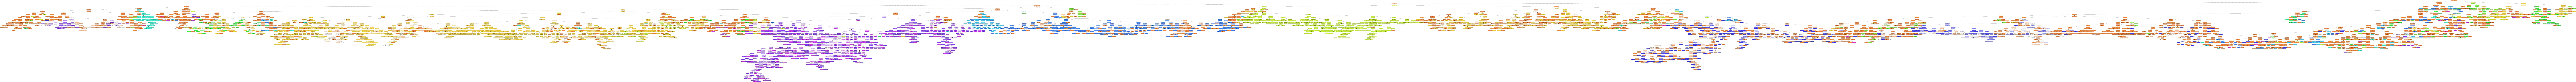

In [0]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

Now let's compare the decision tree model to a random forest.

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rfc_pred = rfc.predict(X_test)

In [0]:
print(set(rfc_pred))

{0}


In [0]:
rfc_predict = set(rfc_pred)
print(rfc_predict)

{0}


In [0]:
print(len(rfc_pred))

848816


In [0]:
print(rfc_pred)

[0 0 0 ... 0 0 2]


In [0]:
print(confusion_matrix(y_test,rfc_pred))

[[226726     45     87      2      7      4      3      1     21     51
       4      1      0      0      0]
 [    34  23284      0      0      0      0      0      0      0      0
       1      0      0      0      0]
 [     3      7  15738      0      0      0      0      0      0      0
       1      0      0      0      0]
 [     6      1      0  12828      0      0      0      0      0      0
       0      0      0      0      0]
 [     9      3      0      0   1072      0      0      0      1      0
       0      0      0      0      0]
 [     1      0      0      0      0    811      0      0      0      0
       0      0      0      0      0]
 [     4      0      0      0      0      0    644      0      0      0
       0      0      0      0      0]
 [     2      0      0      0      0      0      0    588      0      0
       0      0      0      0      0]
 [     5      0      0      0      0      0      0      2    518      0
       0      1      0      0      0]
 [    48  

In [0]:
print(classification_report(y_test,rfc_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226952
           1       1.00      1.00      1.00     23319
           2       0.99      1.00      1.00     15749
           3       1.00      1.00      1.00     12835
           4       0.99      0.99      0.99      1085
           5       1.00      1.00      1.00       812
           6       0.99      0.99      0.99       648
           7       0.99      1.00      1.00       590
           8       0.96      0.98      0.97       526
           9       0.74      0.75      0.75       193
          10       0.68      0.80      0.74       151
          11       0.40      0.26      0.31        70
          12       1.00      1.00      1.00         5
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         3

    accuracy                           1.00    282939
   macro avg       0.85      0.85      0.85    282939
weighted avg       1.00   

In [0]:
sklearn.metrics.accuracy_score(y_test, rfc_pred, normalize=True, sample_weight=None)

0.9984519631439992

In [0]:
lableToAttackDict = {0: 'BENIGN', 1: 'DoS Hulk', 2: 'PortScan', 3: 'DDoS', 4: 'DoS GoldenEye', 5: 'FTP-Patator', 6: 'SSH-Patator', 7: 'DoS slowloris', 8: 'DoS Slowhttptest', 9: 'Bot', 10: 'Web Attack  Brute Force', 11: 'Web Attack XSS', 12: 'Infiltration', 13: 'Web Attack Sql Injection', 14: 'Heartbleed'}

for i in rfc_predict:
  print(lableToAttackDict.get(i))


BENIGN
